In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [12]:
#pip install scikit-learn
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv("C:/Users/lENOVO/ML-course/Data_visual_projs/Mall_Customers.csv")

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


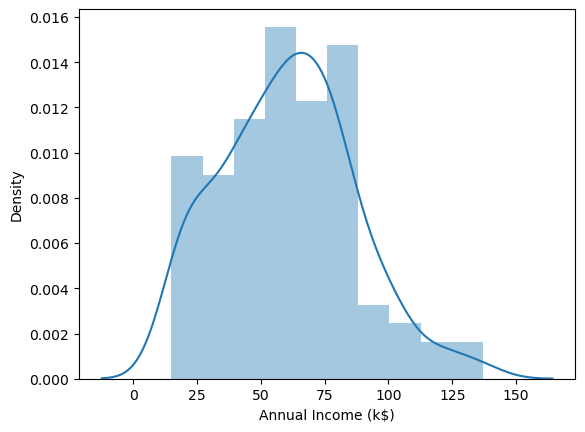

In [16]:
sns.distplot(df['Annual Income (k$)']);

In [17]:
df.columns



Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

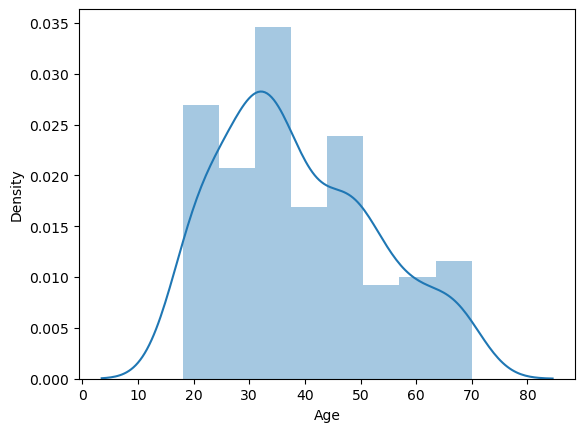

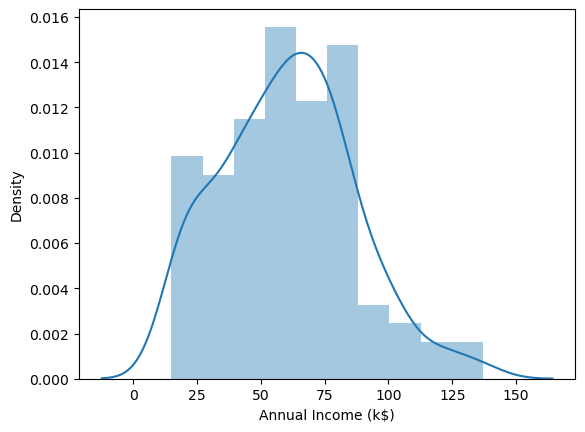

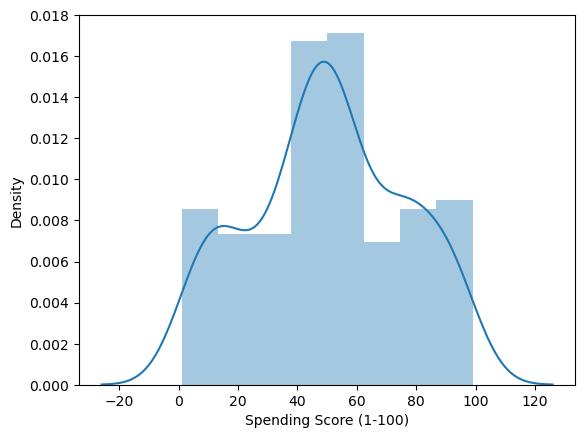

In [19]:
for i in columns:
    plt.figure()
    sns.distplot(df[i]);


**BOX PLOT**

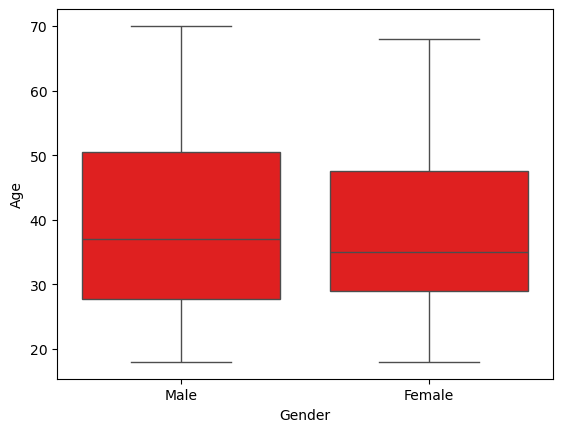

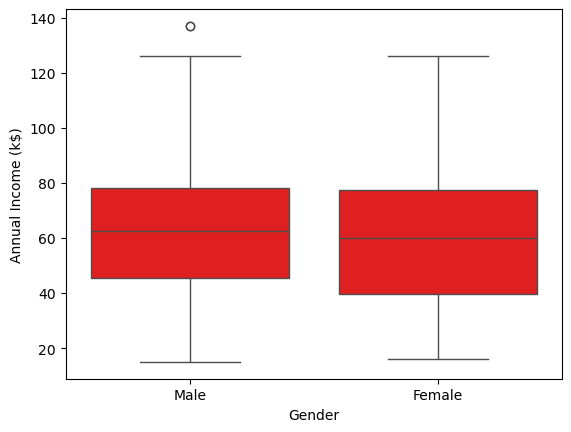

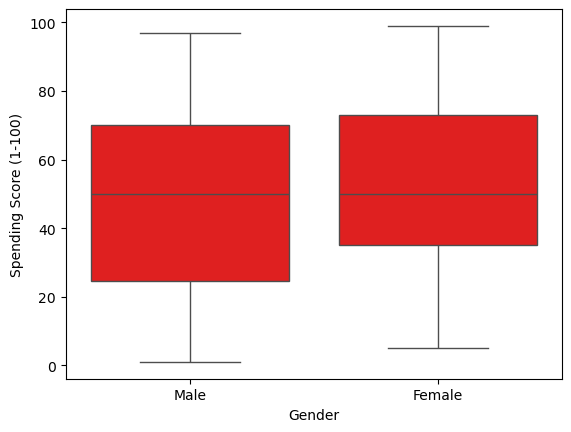

In [25]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i],color='Red')
    

## Bivariate Analysis

In [26]:
columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

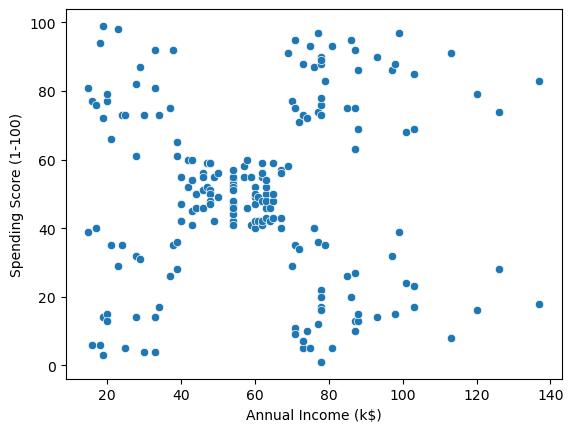

In [27]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

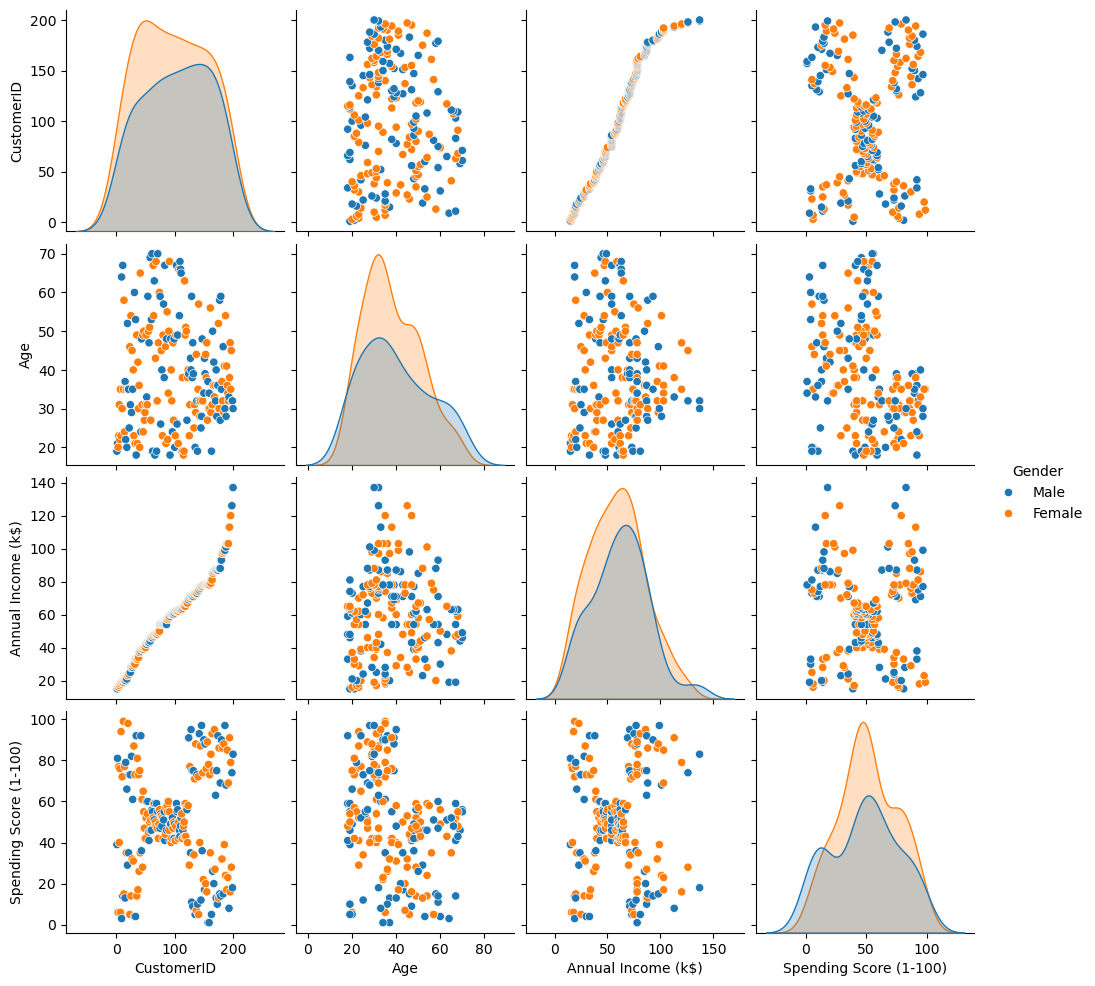

In [29]:
sns.pairplot(df,hue='Gender');

In [34]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()
#double square brackets for it to be considered as a list 

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [111]:
a=df['Age'].mean()
a

38.85

In [45]:
df_no_custid=df.drop('CustomerID',axis=1)
df_numeric

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [46]:
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.corr()
#correlation only takes numeric values,exclude non-numeric values 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


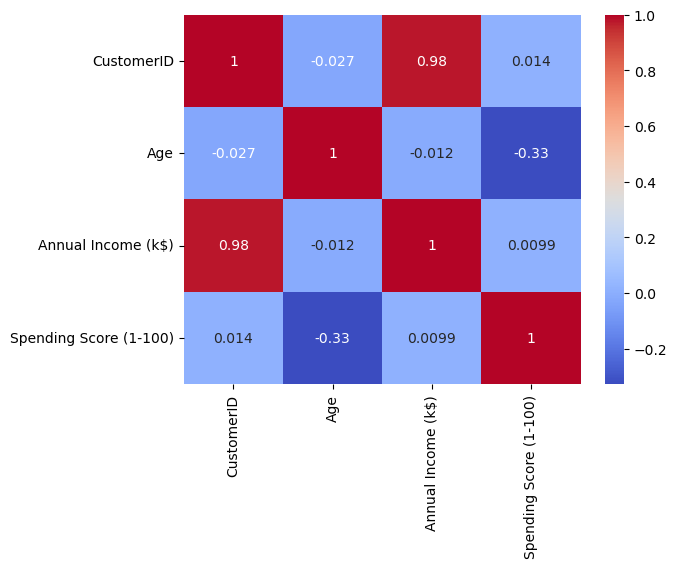

In [118]:
sns.heatmap(df_numeric.corr(),annot=True,cmap='coolwarm')
plt.savefig('corelation_heatmap.png')

## Clustering - Univariate,Bivariate,Multivariate

In [68]:
clustering1=KMeans(n_clusters=3)

In [69]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [70]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [71]:
df['Income Cluster']=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [72]:
df['Income Cluster'].value_counts()

Income Cluster
2    92
1    86
0    22
Name: count, dtype: int64

In [73]:
clustering1.inertia_

25341.28587186322

In [74]:
inertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [75]:
inertia_score

[137277.28000000003,
 49761.73701298701,
 23517.330930930926,
 17402.308080808085,
 9384.572427572428,
 5081.484660267269,
 3984.907059314956,
 3005.678571428571,
 2412.166361416361,
 1758.1453823953823]

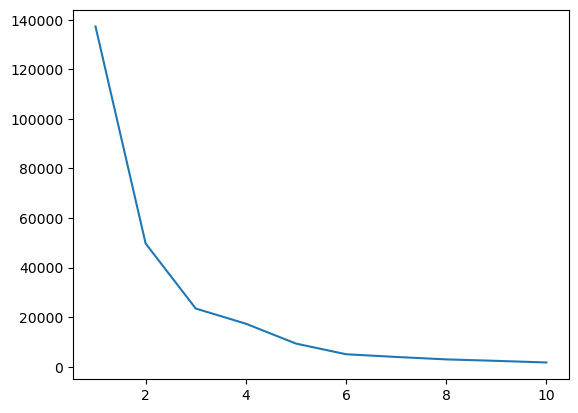

In [76]:
plt.plot(range(1,11),inertia_score)

Elbow point method to find the best numbr of cluster of KMeans 

 Analysis

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [79]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.545455,108.181818,52.000000
1,40.023256,36.348837,50.081395
2,38.065217,71.804348,49.880435


## Bivariate Clustering m

In [92]:
clustering2=KMeans(n_clusters=4)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


Optimizing the cluster points

Finding the cluster size with Elbow method 

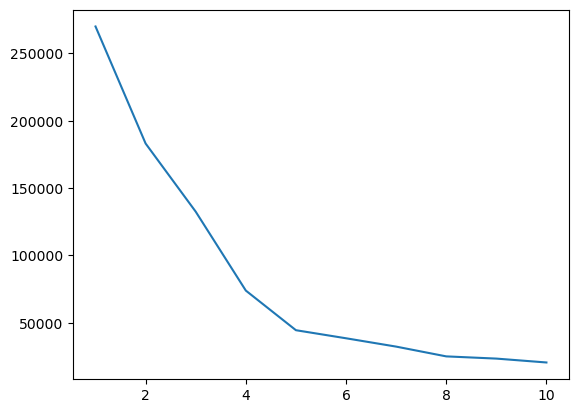

In [83]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11),inertia_scores2)

In [93]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers


,x,y
0,48.260000,56.480000
1,87.000000,18.631579
2,86.538462,82.128205
3,26.304348,20.913043


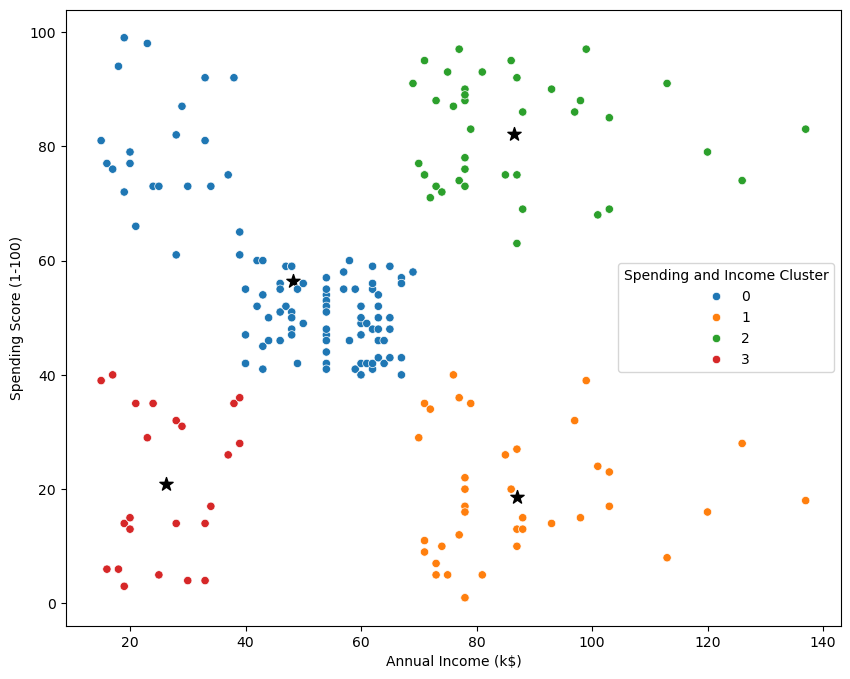

In [117]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10');
plt.savefig('clusterring_bivariate.png')

In [96]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590000,0.410000
1,0.473684,0.526316
2,0.538462,0.461538
3,0.608696,0.391304


In [97]:
df.groupby([ 'Spending and Income Cluster'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,39.200000,48.260000,56.480000
1,40.394737,87.000000,18.631579
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043


## Multivariate Clustering

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scale =StandardScaler()

In [102]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


Converting the object Gender to numerical using One Hot Encoding 

In [103]:
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,True
1,2,21,15,81,1,0,True
2,3,20,16,6,1,3,False
3,4,23,16,77,1,0,False
4,5,31,17,40,1,3,False


Removing unnecessary columns 

In [105]:
df2=df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [106]:
df2=scale.fit_transform(df2)

In [107]:
df2=pd.DataFrame(scale.fit_transform(df2))
df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


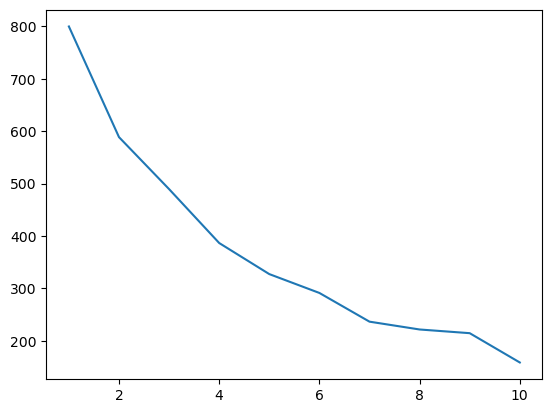

In [110]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [112]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


In [116]:
df.to_csv('customer_segmentation.csv')